# Explanatory analysis of Prosper Loan Data 
## by Stanislava Stachova

## Investigation Overview

The goal of the investigation is to analyse following relationships and prove or disprove the assumptions:

* Relationship between Loan Amount, Borrower Rate/APR and Lender Yield   
* Relationship between Loan amount and Listing category  
* Relationship between Income range and Loan amount
* Relationship between Income range and Term conditions
 


Assumptions:
* _Assumption: I expect that Borrower rate/APR/Lender Yield will have negative correlation with Loan amount._
* _Assumption: I expect that high Income range clients obtain higher Loan Amount._
* _Assumption: I expect that the reason for loan borrowing, determine how large Loan Amount will be._
* _Assumptions: I expect that lower loan amounts are agreed for shorter period and higher Loan amounts are agreed for longer period of time._



## Dataset Overview


The dataset consists of detailed information about Loans provided by Prosper. Dataset consists of nearly 114 thousand observations and 81 features providing specific Loan info. The definitions of each feature is listed in separate file, Prosper Loan Data - Variable definition.


In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
loans=pd.read_csv('loans1.csv')
loans1=pd.read_csv('loans2.csv')
loans2=pd.read_csv('loans3.csv')

## Relationship between Loan Amount, Borrower Rate/APR and Lender Yield   

Based on the graphs shown, the __development of Borrower Rate, Borrower APR and Lender Yield is similar__ what supports the definitions of each variable. 

All three graphs ares lightly right skewed and bimodal. __Noticeable spike__ is around 0.3-0.32 for Lender Yield and Borrower rate and 0.38 for Borrower APR. 

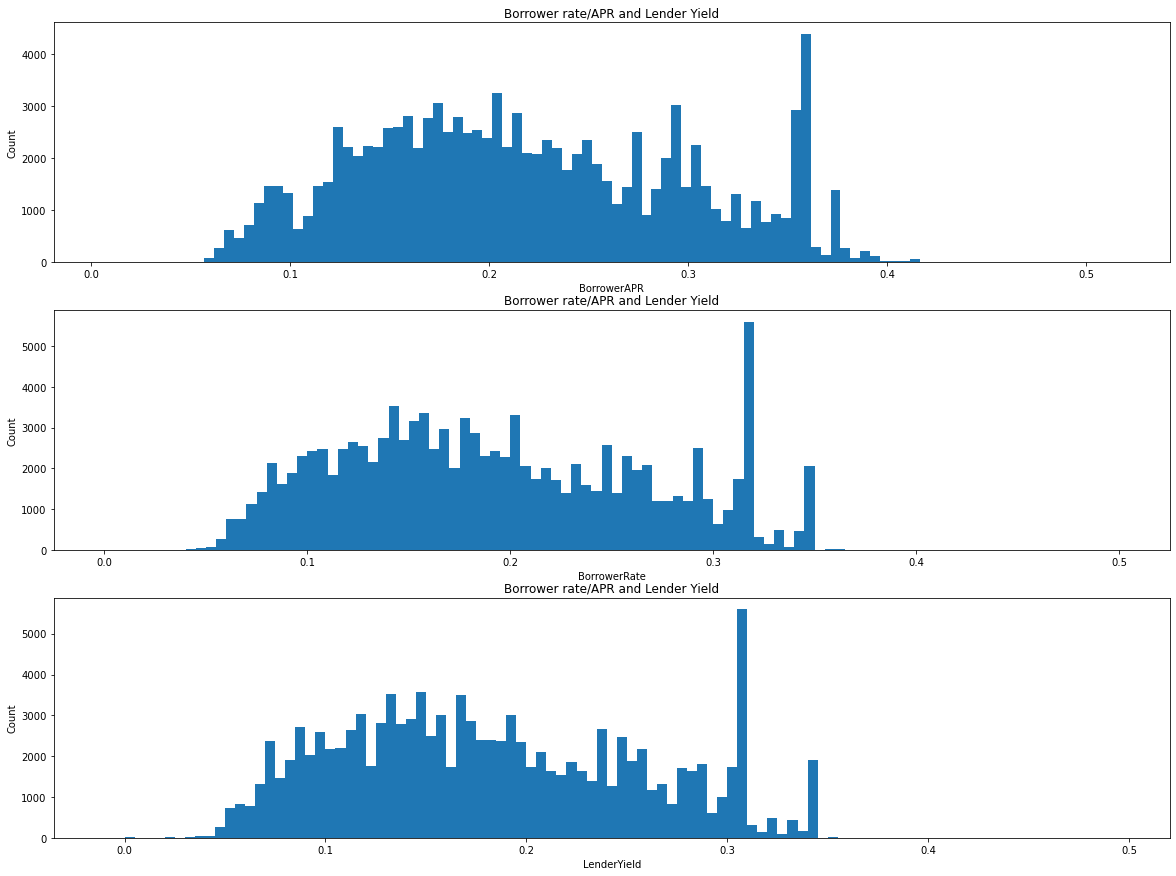

In [9]:
# In order to get better overview, I plotted all three graphs together (Borrower APR, Borrower Rate and Lender Yield)
fig, ax = plt.subplots(nrows=3, figsize = [20,15])

variables = ['BorrowerAPR', 'BorrowerRate', 'LenderYield']
titles = ['BorrowerAPR', 'BorrowerRate', 'LenderYield']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(loans[var]), max(loans[var])+0.005, 0.005)
    ax[i].hist(data = loans, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('{}'.format('Count'))
    ax[i].set_title('{}'.format('Borrower rate/APR and Lender Yield'))

    

    
plt.show()

Based on the heatmap, we see __negative correlation between Borrower rate/APR and Loan Amount__, supporting the general knowleadge, that high amount of the loan is connected to lower interest rate.

We may see __strong positive correlation between Borrower rate and Borrower APR__ as these are comparable variables. Both variables then correlate to __Lender Yield__, as it is actually borrower interest rate but without service fee. 

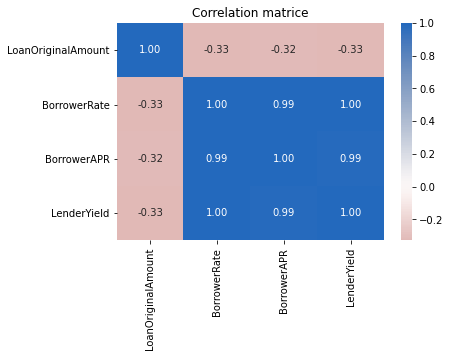

In [10]:
# Learn correlation relationship between Loan Amount, Borrower Rate/APR and Lender Yield
sb.heatmap(loans[['LoanOriginalAmount', 'BorrowerRate', 'BorrowerAPR', 'LenderYield']].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Correlation matrice');

## Relationship between Loan amount and Listing category

In order to look at the relationship between both variables, firstly, let's look at each variable separately.

The distribution of __Loan amount__ is right skewed with several noticeable spikes in frequency at the bars (around 5,000; 10,000 and 15,000). It might represent standard loan amount. 

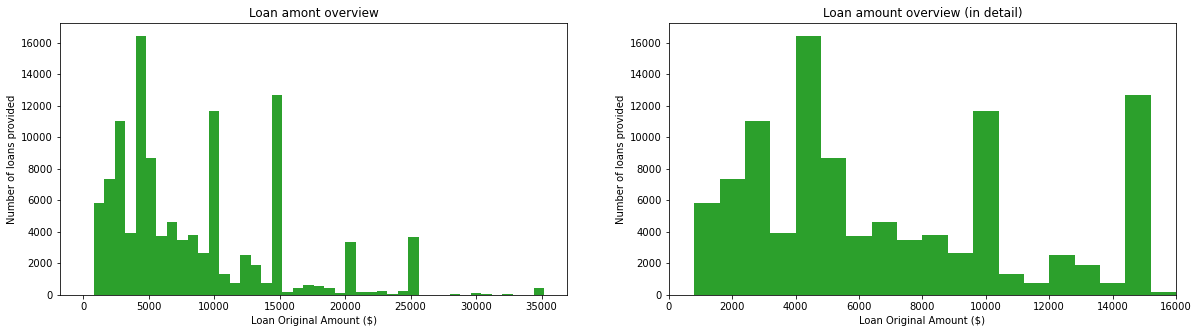

In [11]:
# Loan Original Amount plot using histogram
plt.figure(figsize=[20,5])
base_color=sb.color_palette()[2]

plt.subplot(1,2,1)
bin_size1=800
bins1=np.arange(0, (loans['LoanOriginalAmount'].max())+bin_size1, bin_size1)
plt.hist(data=loans, x='LoanOriginalAmount', bins=bins1, color=base_color)

plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Number of loans provided')
plt.title('Loan amont overview');


# LoanOriginalAmount overview in detail
plt.subplot(1,2,2)
bin_size1=800
bins1=np.arange(0, (loans['LoanOriginalAmount'].max())+bin_size1, bin_size1)
plt.hist(data=loans, x='LoanOriginalAmount', bins=bins1, color=base_color)

plt.xlim((0,16000))
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Number of loans provided')
plt.title('Loan amount overview (in detail)');

In [12]:
# LISTING CATEGORY overview

# The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 
#2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 
#10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 
#13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

# Define function to create new column with listing categories written in text in order to prepare base for Bar chart
def list_categ_text(x): 
    if (x ==0) :
        return 'Not Available'
    elif (x == 1):
        return 'Debt Consolidation'
    elif (x == 2):
        return 'Home Improvement'
    elif (x == 3):
        return 'Business'
    elif (x == 4):
        return 'Personal Loan'
    elif (x == 5):
        return 'Student Use'
    elif (x == 6):
        return 'Auto'
    elif (x == 7):
        return 'Other'
    elif (x == 8):
        return 'Baby&Adoption'
    elif (x == 9):
        return 'Boat'
    elif (x == 10):
        return 'Cosmetic Procedure'
    elif (x == 11):
        return 'Engagement Ring'
    elif (x == 12):
        return 'Green Loans'
    elif (x == 13):
        return 'Household Expenses'
    elif (x == 14):
        return 'Large Purchases'
    elif (x == 15):
        return 'Medical/Dental'
    elif (x == 16):
        return 'Motorcycle'
    elif (x == 17):
        return 'RV'
    elif (x == 18):
        return 'Taxes'
    elif (x == 19):
        return 'Vacation'
    else:
        return 'Wedding Loans'

loans['ListingCategory_text'] = loans['ListingCategory (numeric)'].apply(list_categ_text)
loans.head(2)

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory_text,Income_range_text
0,0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,...,0.0,0.0,0.0,1.0,0,0,0.0,258,Not Available,"25,000-49,999"
1,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,...,0.0,0.0,0.0,1.0,0,0,0.0,1,Home Improvement,"50,000-74,999"


In [13]:
# Set order as parameter in plot code
order_category=loans['ListingCategory_text'].value_counts().index


In [14]:
# Removal of Not Available listing category from the colum
filter_nan=loans['ListingCategory_text']=='Not Available'
loans_without_nan=loans.loc[~filter_nan, :]
loans_without_nan.head(2)

,Unnamed: 0,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,...,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCategory_text,Income_range_text
1,1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,...,0.0,0.0,0.0,1.0,0,0,0.0,1,Home Improvement,"50,000-74,999"
3,3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,...,0.0,0.0,0.0,1.0,0,0,0.0,158,Motorcycle,"25,000-49,999"


In [15]:
# Set order as parameter in plot code
# Do not plot low-value categories
order_without_nan=loans_without_nan['ListingCategory_text'].value_counts()[0:13]
order_without_nan

Debt Consolidation    58308
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Name: ListingCategory_text, dtype: int64

Majority of loans refer to the __category 'Debt Consolidation'__ (nearly 6,000), followed by __'Other'__ (slightly above 10,000), __'Home Improvemenmt'__ and __'Business'__(around 10,000) and others (low amounts).

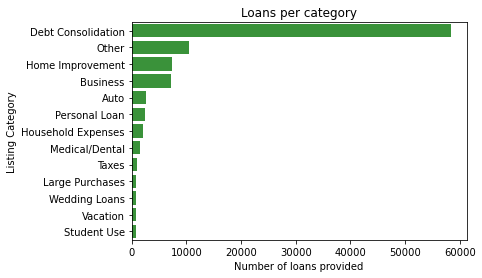

In [16]:
# Plot Bar chart without Not Available listing category and Low-value categories
sb.countplot(data=loans_without_nan, y='ListingCategory_text', color=base_color, order=order_without_nan.index)

plt.xlabel('Number of loans provided')
plt.ylabel('Listing Category')
plt.title('Loans per category');

The highest median value is seen in Debt Consolidation (higher distribution around standard Loan amounts as of USD 5,000; USD 10,000 and USD 15,000) and Wedding Loans.

The lowest median value is seen in Student use, Personal Loan and Vacation assuming that only small value loans are popular. This assumption is supported by distribution on the graph, which is quite high around median value (lower than USD 5,000)



In [17]:
# Removal of Not Available listing category from the colum
filter_nan=loans['ListingCategory_text']=='Not Available'
loans_without_nan=loans.loc[~filter_nan, :]

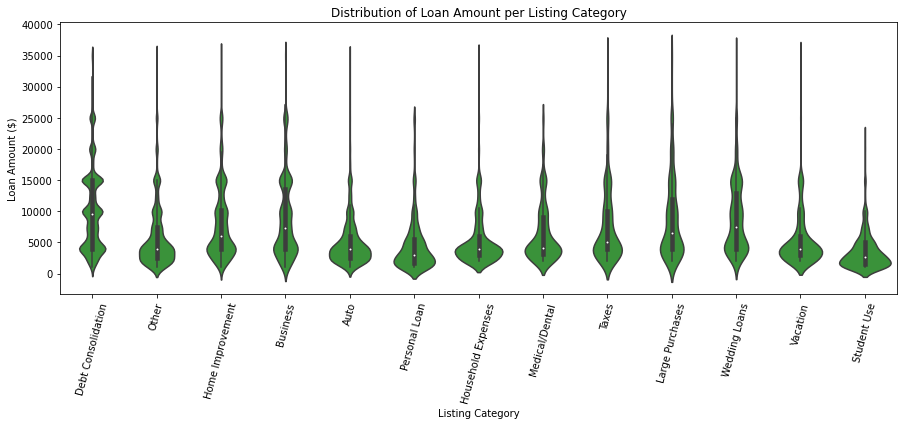

In [18]:
plt.figure(figsize=[15,5])
sb.violinplot(data=loans_without_nan, y='LoanOriginalAmount', x='ListingCategory_text', color=base_color, order=order_without_nan.index, innner=None)
plt.xticks(rotation=75)
plt.xlabel('Listing Category')
plt.ylabel('Loan Amount ($)')
plt.title('Distribution of Loan Amount per Listing Category');

## Relationship between Income range and Loan amount

__Majority__ of Borrowers __belongs to__ Income range of __USD 25,000-49,999 (more than 32,000 borrowers)__ directly followed by Borrowers from Income range USD 50,000-74,999 (around 31,000 borrowers).

The __smallest group__ of Borrowers belong to Income range __USD 1-24,999__.


In [19]:
# Review of INCOME RANGE
# The income range of the borrower at the time the listing was created.

# Set definition in order to create new column with ranges to easily plot bar chart
def income_range(x): 
    if (x =='$1-24,999') :
        return '1-24,999'
    elif (x == '$25,000-49,999'):
        return '25,000-49,999'
    elif (x == '$50,000-74,999'):
        return '50,000-74,999'
    elif (x == '$75,000-99,999'):
        return '75,000-99,999'
    elif (x == '$100,000+'):
        return '100,000+'
    else:
        return 'Not available'
    

loans['Income_range_text'] = loans['IncomeRange'].apply(income_range)

In [20]:
# Types of income range
income_range = ['1-24,999', '25,000-49,999', '50,000-74,999', '75,000-99,999', '100,000+', 'Not available']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
irange = pd.api.types.CategoricalDtype(ordered=True, categories=income_range)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
loans['Income_range_text'] = loans['Income_range_text'].astype(irange);

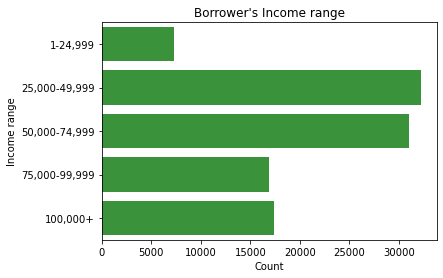

In [21]:
# Plot for INCOME RANGE
sb.countplot(data=loans, y='Income_range_text', color=base_color, order=['1-24,999', '25,000-49,999', '50,000-74,999', '75,000-99,999', '100,000+'])
plt.xlabel('Count')
plt.ylabel('Income range')
plt.title("Borrower's Income range");

Income range __USD 1-24,999__ has a __median value__ slightly lower than __5,000__. The highest density is right around median value.

Income range __USD 25,000-49,999__ has median value USD 5,000. The data distribution is multimodal, there are __2 noticeable peaks (around USD 5,000 and USD 10,000)__. The third peak is quite small in comparison to first two. However, it shows that in this income range, some Borrowers obtained Loan of value USD 15,000.

Income range __USD 50,000-74,999__ full distribution shows __median value slightly less than USD 10,000__. This range has three peaks, at the value of 1st quartil (lower than USD 5,000), another peak is above 3rd quartil (around USD 15,000). The third peak is smaller at the level of USD 10,000. This range includes also Borrowers who got loan of higher value (USD, 20,000 or minor group even higher).

Income range __USD 75,000-99,999__ has five __peaks__ at the level around __USD 5,000, USD 10,000,  USD 15,000 and minor Borrowers__ were able to obtain loan of value __USD 20,000 and 25,000__. Median value is around USD 10,000.

Income range __+100,000__ has __median value__ slightly lower than __USD 15,0000__. It has 3 peaks rather similar in density around value USD 5,000, USD 15,000 and USD 25,000.The range covers couple of Borrowers who obtained loan of higher values (USD 35,000).


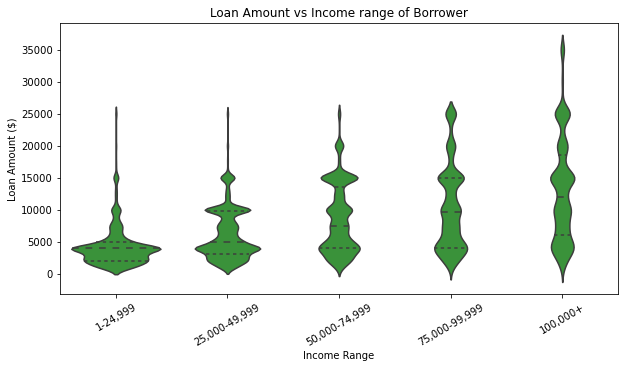

In [22]:
# Plot violin chart to capture distribution of Loan Amount among Income ranges

plt.figure(figsize=[10,5])
sb.color_palette()[0]
sb.violinplot(data=loans, x='Income_range_text', y='LoanOriginalAmount', color=base_color, inner='quartile', order=['1-24,999', '25,000-49,999', '50,000-74,999','75,000-99,999', '100,000+'])
plt.xticks(rotation=30)
plt.title('Loan Amount vs Income range of Borrower')
plt.xlabel('Income Range')
plt.ylabel('Loan Amount ($)');

## Relationship between Income range and Term conditions

The __most Loans__ were provided for period of __36 months (more than 8,000)__, followed by loans provided for 60 months (slightly more than 21,000). Minority of loans provided are those agreed for short-term perdiod of 12 months.

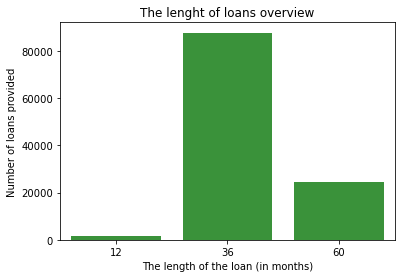

In [23]:
# Loan overview based on TERM CONDITIONS
base_color=sb.color_palette()[2]
sb.countplot(data=loans, x='Term', color=base_color)

plt.xlabel('The length of the loan (in months)')
plt.ylabel('Number of loans provided')
plt.title('The lenght of loans overview');

Based on the heatmap, we may conclude that, __the most number of loans were borrowed for 36 months__ period to borrowers from __income range USD 25,000-49,999__ followed by income range USD 50,000-74,999.

The __least__ number of __loans were borrowed for 12 months__ period to borrowers from __income range USD 1-24,999.__

In [24]:
ct_counts = loans.groupby(['Income_range_text', 'Term']).size()[0:15]

In [25]:
ct_counts = ct_counts.reset_index(name='count')

In [26]:
ct_counts = ct_counts.pivot(index = 'Income_range_text', columns = 'Term', values = 'count')

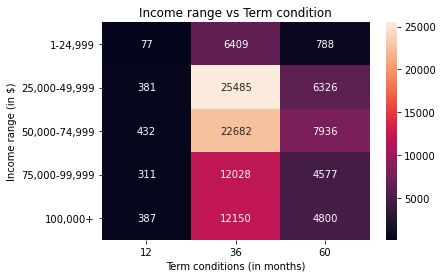

In [27]:
sb.heatmap(ct_counts, annot=True, fmt='.0f')
plt.xlabel('Term conditions (in months)')
plt.ylabel('Income range (in $)')
plt.title('Income range vs Term condition');

Thank you!